## To develop a machine learning model that classifies websites as either legitimate or phishing based on features extracted from their URLs and metadata.



In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


## Import the dataset, understand it

In [2]:
data = pd.read_csv('dataset_phishing.csv')

In [3]:
data

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,legitimate
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,0,...,1,0,0,211,6728,0,0,1,0,phishing
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,0,...,0,0,0,2809,8515,8,0,1,10,legitimate
11428,http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,legitimate


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [5]:
print(data.isnull().sum())


url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64


In [6]:
data['status'] = data['status'].apply(lambda x: 1 if x == 'phishing' else 0)

In [8]:
data['status']

0        0
1        1
2        1
3        0
4        0
        ..
11425    0
11426    1
11427    0
11428    0
11429    1
Name: status, Length: 11430, dtype: int64

## Seperate Features and Target Variable and scale for better results

In [10]:
X = data.drop(columns=['status', 'url'])
y = data['status']

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

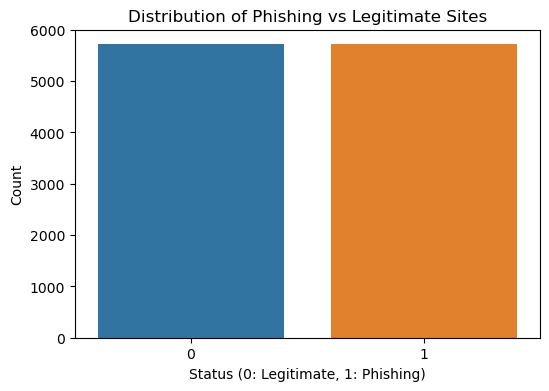

C:\Users\isvan\AppData\Local\Temp\ipykernel_17612\1927182008.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


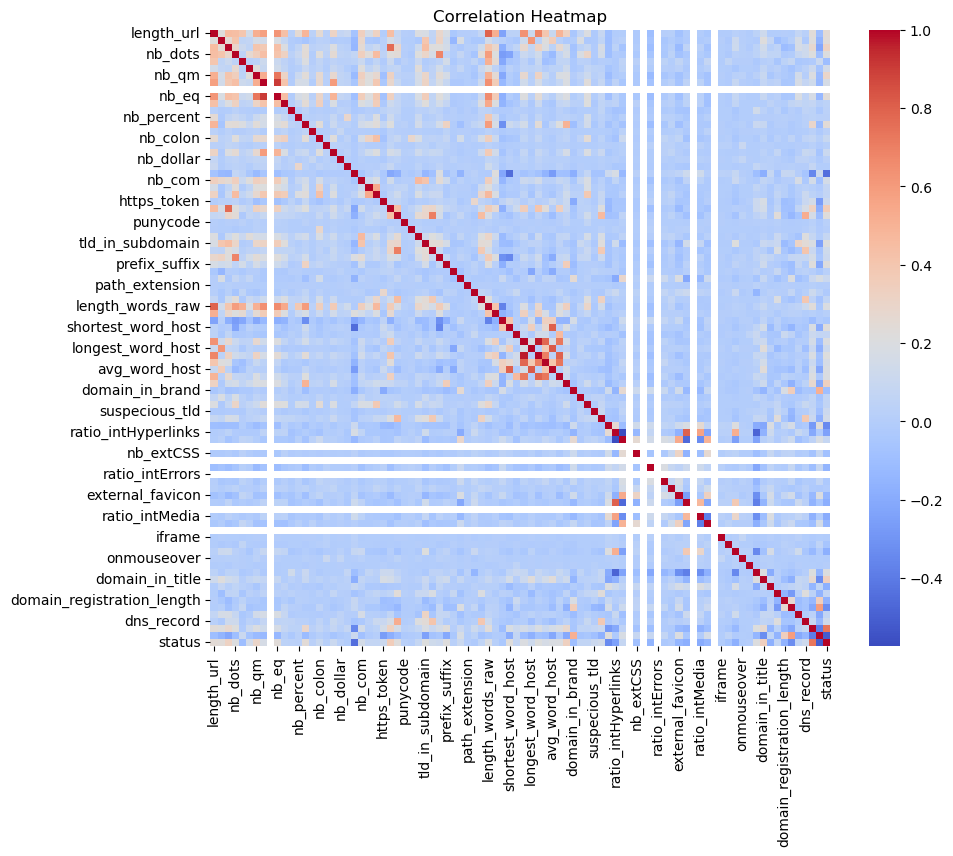

In [14]:
# Plot distribution of phishing vs legitimate sites
plt.figure(figsize=(6, 4))
sns.countplot(x='status', data=data)
plt.title('Distribution of Phishing vs Legitimate Sites')
plt.xlabel('Status (0: Legitimate, 1: Phishing)')
plt.ylabel('Count')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()


# What is the problem here?

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

print(feature_importance_df.head(10))

                Feature  Importance
85         google_index    0.165390
86            page_rank    0.104115
56        nb_hyperlinks    0.081922
83          web_traffic    0.079373
20               nb_www    0.042660
82           domain_age    0.036414
50          phish_hints    0.028203
58  ratio_extHyperlinks    0.027243
74          safe_anchor    0.025116
57  ratio_intHyperlinks    0.024228


In [27]:
selected_features = feature_importance_df[feature_importance_df['Importance'] > 0.02]['Feature']

In [28]:
selected_features

85            google_index
86               page_rank
56           nb_hyperlinks
83             web_traffic
20                  nb_www
82              domain_age
50             phish_hints
58     ratio_extHyperlinks
74             safe_anchor
57     ratio_intHyperlinks
46       longest_word_path
62    ratio_extRedirection
25        ratio_digits_url
Name: Feature, dtype: object

In [29]:
X_selected = X[selected_features]

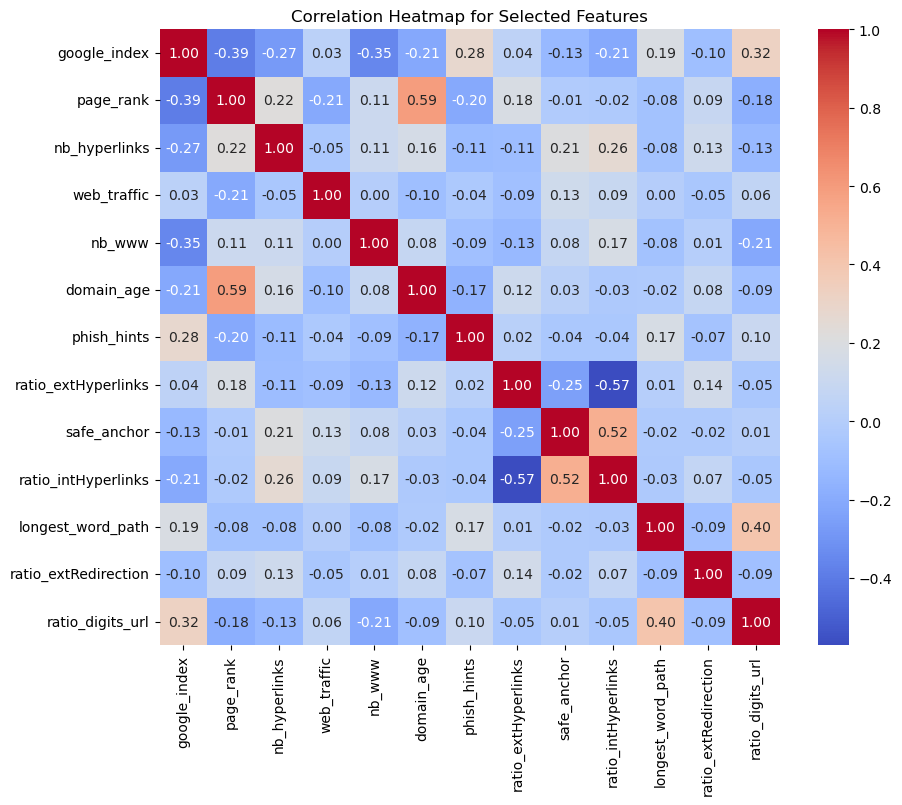

In [30]:
plt.figure(figsize=(10, 8))
selected_corr = pd.DataFrame(X_selected).corr()
sns.heatmap(selected_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Selected Features')
plt.show()


In [31]:
# Split the dataset with selected features
X_train_selected, X_test_selected, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42)


In [32]:
# Train Logistic Regression
log_reg_selected = LogisticRegression(random_state=42, max_iter=500)
log_reg_selected.fit(X_train_selected, y_train)

# Evaluate
y_pred_lr_selected = log_reg_selected.predict(X_test_selected)
print("Logistic Regression with Selected Features:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr_selected))
print("Classification Report:\n", classification_report(y_test, y_pred_lr_selected))

# Train Random Forest
rf_selected = RandomForestClassifier(random_state=42, n_estimators=100)
rf_selected.fit(X_train_selected, y_train)

# Evaluate
y_pred_rf_selected = rf_selected.predict(X_test_selected)
print("Random Forest with Selected Features:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_selected))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_selected))


Logistic Regression with Selected Features:
Accuracy: 0.6487314085739283
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.85      0.71      1157
           1       0.74      0.45      0.56      1129

    accuracy                           0.65      2286
   macro avg       0.67      0.65      0.63      2286
weighted avg       0.67      0.65      0.63      2286

Random Forest with Selected Features:
Accuracy: 0.9606299212598425
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1157
           1       0.96      0.96      0.96      1129

    accuracy                           0.96      2286
   macro avg       0.96      0.96      0.96      2286
weighted avg       0.96      0.96      0.96      2286

